<a href="https://colab.research.google.com/github/AdityaKumbhar21/Deep-Learning/blob/main/ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
!pip install tensorflow

In [104]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [105]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [107]:
# dividing in X and y

X = df.iloc[:, 3:13]
y = df['Exited']

In [108]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [109]:
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [110]:
X = X.drop(columns=['Geography','Gender'])

In [111]:
X = pd.concat([X,geography, gender], axis = 1)

In [112]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [113]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Implementing ANN

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [115]:
X_train.shape

(8000, 11)

In [116]:
model = Sequential()

In [117]:
# adding input layers
model.add(Dense(units=11, activation='relu'))

In [118]:
# adding hidden layer 1
model.add(Dense(units=7, activation='relu'))

In [119]:
# adding the hidden layer 2 with droupout as 20%
model.add(Dense(units=6, activation='relu'))
model.add(Dropout(0.2))

In [120]:
# adding the output layer
model.add(Dense(units=1, activation='sigmoid')) # as this is binary classification

In [121]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [122]:
# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [123]:
model_history = model.fit(X_train, y_train, validation_split = 0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7946 - loss: 0.5381 - val_accuracy: 0.7955 - val_loss: 0.4557
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7953 - loss: 0.4421 - val_accuracy: 0.7955 - val_loss: 0.4423
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8017 - loss: 0.4191 - val_accuracy: 0.7986 - val_loss: 0.4365
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8119 - loss: 0.4196 - val_accuracy: 0.8084 - val_loss: 0.4311
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8152 - loss: 0.4307 - val_accuracy: 0.8133 - val_loss: 0.4252
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8234 - loss: 0.4073 - val_accuracy: 0.8175 - val_loss: 0.4180
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8345 - loss: 0.4059 - val_accuracy: 0.8217 - val_loss: 0.4092
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8429 - loss: 0.3826 -

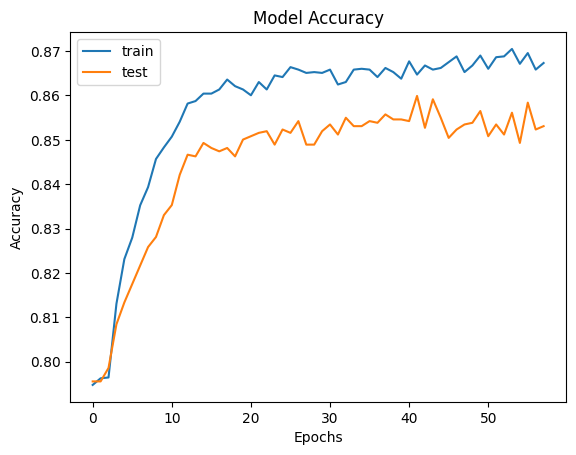

In [124]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

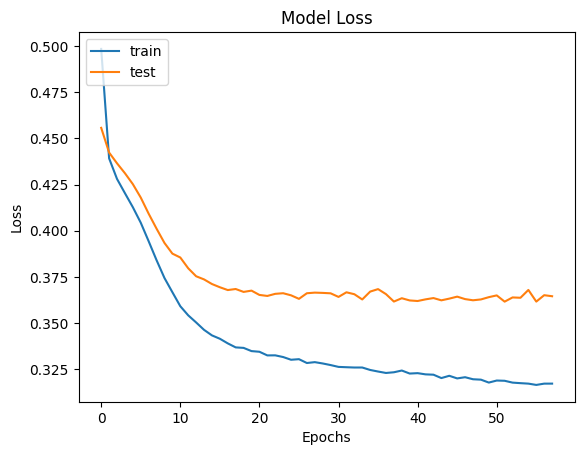

In [125]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [126]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [127]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred, y_test)
matrix

array([[1533,  208],
       [  62,  197]])

In [128]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
score

0.865